In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import time
import datetime

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error,r2_score

In [2]:
data = pd.read_csv("Googleplaystore.csv")

In [3]:
# DATA EXPLORATION 

In [4]:
# Print first few rows from data

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Print last few rows from data

data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
# Shape of data 

data.shape

(10841, 13)

In [7]:
# Basic information of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
# Checking null values

data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
# Types of data

data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [10]:
# Describing our data

data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [11]:
# Columns present in our data

data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [12]:
playstore = data[data.Type == 'Free']

In [13]:
# DATA CLEANING 

In [14]:
# The best way to fill missing values might be using the median instead of mean

playstore['Rating'] = playstore['Rating'].fillna(playstore['Rating'].median())

In [16]:
# Count the number of unique values in category column 

playstore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [18]:
# Removing NaN values
playstore = playstore[pd.notnull(playstore['Last Updated'])]
playstore = playstore[pd.notnull(playstore['Content Rating'])]

In [19]:
# DATA VISUALIZATION

Text(0.5, 1.0, 'Count of application according to category')

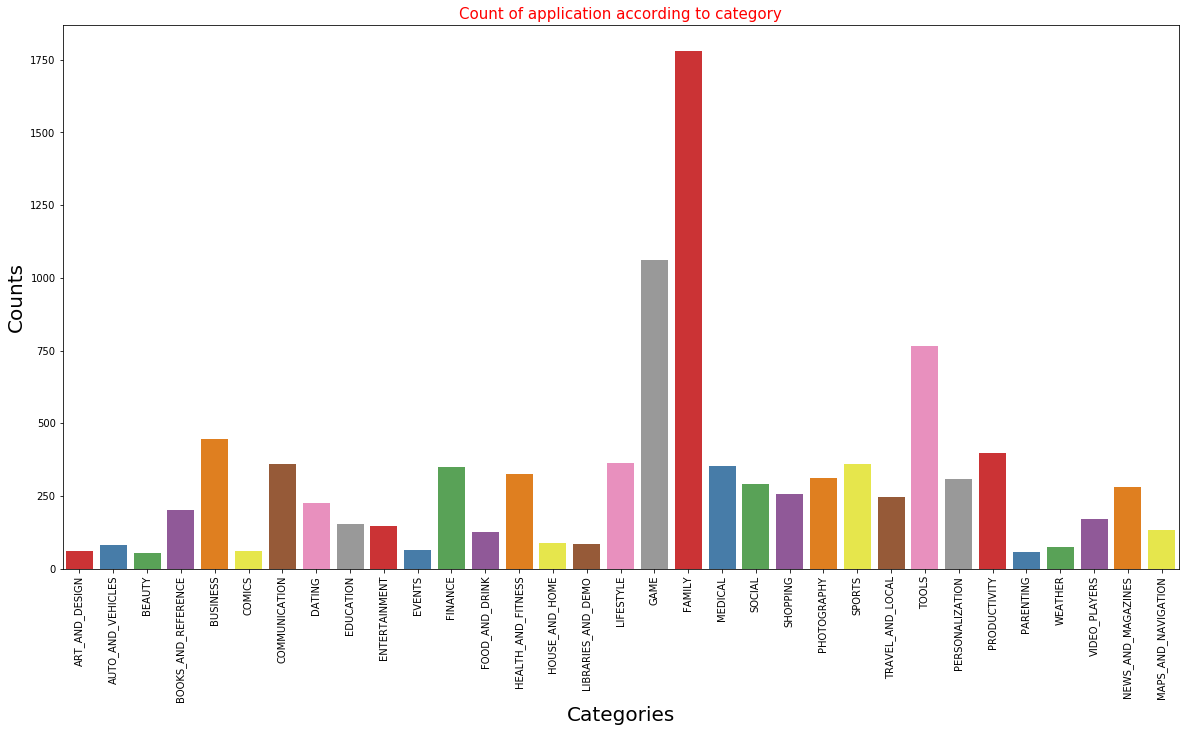

In [20]:
# TO COUNT THE APPLICATION ACCORDING TO CATEGORY 

plt.figure(figsize=(20, 10))
sns.countplot(x='Category', data=playstore, palette='Set1')
plt.xticks(rotation=90)
plt.xlabel('Categories', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.title('Count of application according to category', fontsize=15, color='r')

# CONCLUSION 
# From the data, we can conclude that family category having the highest number of application in Google Playstore. 

Text(0.5, 1.0, 'Distribution of Rating')

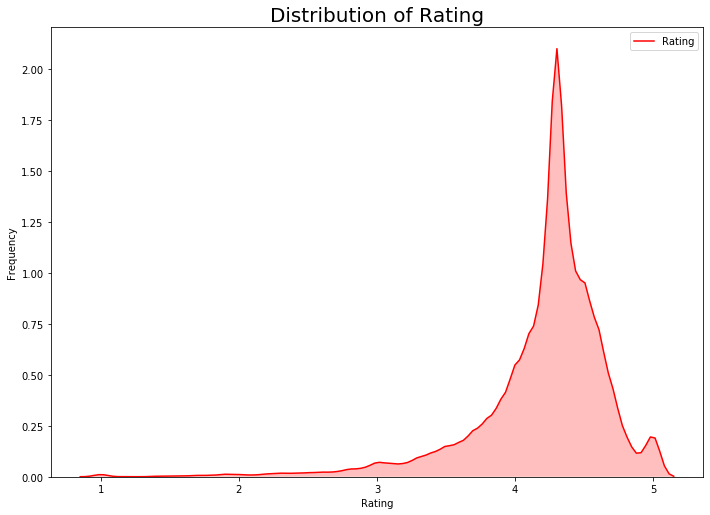

In [21]:
# TO IDENTIFY THE DISTRIBUTION OF RATING 

from pylab import rcParams

rcParams['figure.figsize'] = 11.7, 8.27
g = sns.kdeplot(playstore.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

# CONCLUSION 
# From the data, we can conclude that most of the application have above 4.0 application ratings

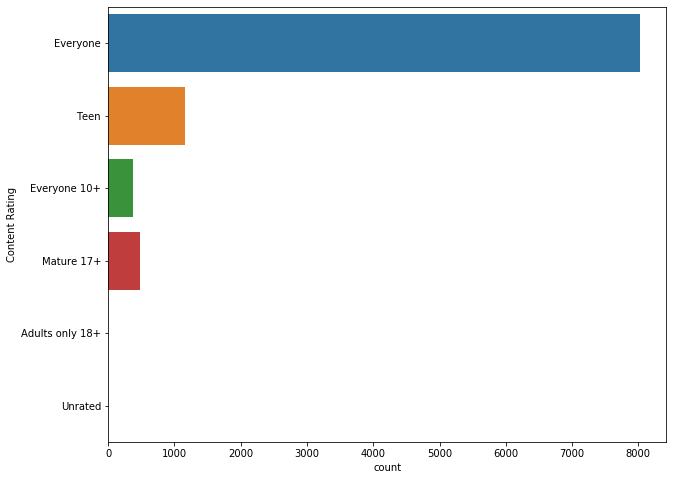

In [22]:
# TO IDENTIFY WHICH CONTENT RATING THAT HAVE THE HIGHEST NUMBER 

plt.figure(figsize=(10,8))
ax = sns.countplot(y='Content Rating', data=playstore)

# CONCLUSION 
# From the data, we can conclude that the application are mostly for everyone. This is happen perhaps because if digital products are eligible to everyone,
# there will be a higher demand for the application and also reach a wider exposure

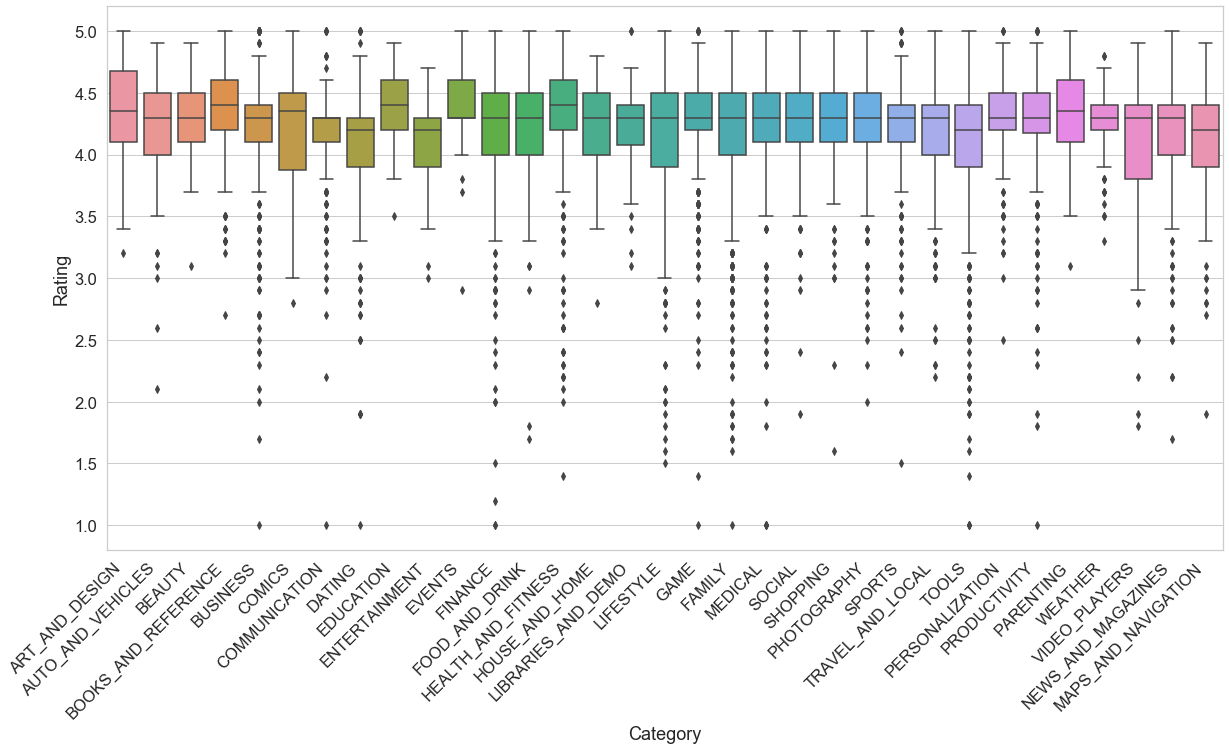

In [23]:
# TO IDENTIFY APPLICATION CATEGORY THAT HAVE THE HIGHEST RATING 

sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x="Category",y="Rating", data=playstore)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')


# CONCLUSION 
# From the data, we can conclude that 

In [24]:
# CATEGORICAL DATA ENCODING 

In [25]:
# Category features encoding

CategoryList = playstore['Category'].unique().tolist() 
CategoryList = ['cat_' + word for word in CategoryList]
playstore = pd.concat([playstore, pd.get_dummies(playstore['Category'], prefix='cat')], axis=1)

In [26]:
# App values encoding

LE = preprocessing.LabelEncoder()
playstore['App'] = LE.fit_transform(playstore['App'])

In [27]:
# Genres features encoding

LE = preprocessing.LabelEncoder()
playstore['Genres'] = LE.fit_transform(playstore['Genres'])

In [28]:
# Content Rating features encoding

LE = preprocessing.LabelEncoder()
playstore['Content Rating'] = LE.fit_transform(playstore['Content Rating'])

In [30]:
# Last Updated encoding

playstore['Last Updated'] = playstore['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))

In [31]:
# Type encoding

playstore['Type'] = pd.get_dummies(playstore['Type'])

In [32]:
# Price cleaning

playstore['Price'] = playstore['Price'].apply(lambda x : x.strip('$'))

In [33]:
# Installs cleaning

playstore['Installs'] = playstore['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [34]:
# Convert Kbytes to Mbytes

k_indices = playstore['Size'].loc[playstore['Size'].str.contains('k')].index.tolist()

converter = pd.DataFrame(playstore.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))

playstore.loc[k_indices,'Size'] = converter

In [35]:
# Size cleaning

playstore['Size'] = playstore['Size'].apply(lambda x: x.strip('M'))
playstore[playstore['Size'] == 'Varies with device'] = 0
playstore['Size'] = playstore['Size'].astype(float)

In [36]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,6432,ART_AND_DESIGN,4.1,159,19.0,10000,1,0,1,8,...,0,0,0,0,0,0,0,0,0,0
1,2436,ART_AND_DESIGN,3.9,967,14.0,500000,1,0,1,11,...,0,0,0,0,0,0,0,0,0,0
2,7989,ART_AND_DESIGN,4.7,87510,8.7,5000000,1,0,1,8,...,0,0,0,0,0,0,0,0,0,0
3,7230,ART_AND_DESIGN,4.5,215644,25.0,50000000,1,0,4,8,...,0,0,0,0,0,0,0,0,0,0
4,6485,ART_AND_DESIGN,4.3,967,2.8,100000,1,0,1,10,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# SPLITTING THE DATA SET 

features = ['App', 'Reviews', 'Size', 'Installs', 'Content Rating', 'Genres']
features.extend(CategoryList)

X = playstore[features]
y = playstore['Rating']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [39]:
# FEATURE ENGINEERING 

In [41]:
sc_X = StandardScaler()

In [42]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [43]:
# BUILDING THE MODEL 

In [44]:
# DECISION TREE REGRESSION

In [45]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(criterion='mae', max_depth=5, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [46]:
accuracy = clf.score(X_test, y_test)
accuracy

0.9211296389381078

In [47]:
# RANDOM FOREST REGRESSION MODEL 

In [48]:
model = RandomForestRegressor(n_estimators = 200, n_jobs=-1, random_state=10)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [49]:
acc = model.score(X_test, y_test)
acc

0.9308866476744729

In [50]:
Pred = model.predict(X_test)
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, Pred)

('Mean Absolute Error:', 0.25039923638778216)

In [51]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Pred))

('Root Mean Squared Error:', 0.42506257732022723)

In [52]:
# MODEL EVALUATION USING CROSS VALIDATION 

In [53]:
X = playstore.loc[:,['Reviews', 'Size', 'Installs', 'Content Rating']]

x_train, x_cv, y_train, y_cv = train_test_split(X, playstore.Rating)

clf = tree.DecisionTreeRegressor(criterion='mae', max_depth=5, min_samples_leaf=5, random_state=42)

clf.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [54]:
ac = clf.score(x_cv, y_cv)
ac

0.9135276004414283